# Coding Assignment 1

## *Authors: Tucker Simpson and Seamus O'Connell*

## Problem 1:

In [12]:
import math

In [48]:
# Input: decimal number x and decimal number y
# Output: quotient-remainder pair (q, r) such that x = qy+r, and the run-time described in the assignment
def divide(x, y):
    # Base cases: if the numerator is less than the denominator, return the q = 0, r = numerator
    if x < y:
        return 0, x, 0
    # if the numerator is equal to the denominator, return q = 1, r = 0
    if x == y:
        return 1, 0, 0

    x1 = x//2  # shift numerator over 1 place (bit shift)
    
    # Calculate the quotient, remainder, and cost of the smaller numerator and denominator pair
    (q1, r1, cost) = divide(x1, y)

    # Left shift to adapt answer to original input
    q = 2 * q1
    r = 2 * r1

    # If the numerator was odd, increment it by one
    if x % 2 != 0:
        cost += 1
        r += 1

    # If the resulting numerator is bigger than the denominator, add one to the quotient and subtract y from the
    # denominator
    if r >= y:        
        # any positive integer times 2 is an even integer, so q is always even (increment cost by 1)
        cost += 1
        q += 1
                
        # Increment the cost by the max number of digits
        cost += max(int(math.log10(r)), int(math.log10(y))) + 1
        r -= y

    return q, r, cost


# Test cases:

In [64]:
divide(5,2)

(2, 1, 1)

In [65]:
divide(21, 15)

(1, 6, 4)

In [66]:
divide(0, 5)

(0, 0, 0)

In [67]:
divide(16, 4)

(4, 0, 0)

In [68]:
divide(19, 4)

(4, 3, 2)

# What is the run-time when run with (30294982, 2124234)?

In [55]:
divide(30294982, 2124234)

(14, 555706, 26)


We find the run-time is 26.

# Problem 2:

#### *Helper Methods*

In [27]:
# Citation: taken from helper.py
def read_pi(n):
    # opens the file name "pi" and reads the first n digits
    # puts it in the list pi, and returns that list
    pi = list()
    f = open('../../Downloads/pi', 'r')
    for i in range(n):
        d = f.read(1)
        pi.append(int(d))
    return pi

#### *Naive Approach*

In [28]:
import time
import matplotlib.pyplot as plt

In [29]:
# Input: n - defines pi[0:n-1] which hold the first n digits of pi
# Output: number of inversions in the array pi[0:n-1] defined above
def naive_inversions(n):
    # Put the first n digits of pi into an array for processing
    pi = read_pi(n)

    num_inversions = 0

    # Manually check every pair in pi[0:n-1] and check whether there is an inversion
    for i in range(0, n):
        for j in range(i + 1, n):
            if pi[j] < pi[i]:
                num_inversions += 1

    return num_inversions

In [30]:
# Input: number of digits of pi which we will process to check for inversions using the naive approach
# Output: time it takes to check for inversions in the first n digits of pi using the naive approach
def naive_inversions_time(n):
    start_time = time.time()
    naive_inversions(n)
    end_time = time.time()

    return end_time - start_time

### *Divide and Conquer Approach*

In [32]:
# Input: n - defines pi[0:n-1] which hold the first n digits of pi
# Output: number of inversions in the array pi[0:n-1] defined above
def fast_inversions(n):
    pi = read_pi(n)
    res = sort_and_count(pi)[1]
    return res

In [56]:
# Input: the array pi[0:n-1] which we will process and check for inversions
# Output: time it takes to check for inversions in the first n digits of pi using the naive approach
def sort_and_count(pi):
    # Base case: pi only contains one or no element(s), and therefore it is sorted and has no inversions
    if len(pi) == 1 or 0:
        return pi, 0

    # Split the array into two halves
    m = len(pi) // 2

    # Returns the number of inversions in each half and a sorted copy of the half
    B1, I1 = sort_and_count(pi[:m])
    B2, I2 = sort_and_count(pi[m:])

    # Counts the number of cross inversions between the two halves of the array and also combines the two halves into
    # a sorted array
    C, B = count_cross_inv(B1, B2)

    return B, I1 + I2 + C

In [57]:
# Input: Two sorted arrays P[0:p-1] and Q[0:q-1]
# Output: num, the number of cross inversions between P and Q, and combine[0:p+q-2] the sorted array containing all
# elements of P and Q
def count_cross_inv(P, Q):
    p = len(P)
    q = len(Q)

    i = j = num = k = 0

    combine = [None] * (p + q)

    # iterates through both arrays until we reach the end of one of them. Counts inversions and puts elements into
    # combine in ascending order
    while i < p and j < q:
        # Element P[i] has a lower index then Q[j] in pi, but has a higher value. Inversion found!
        if P[i] > Q[j]:
            combine[k] = Q[j]
            num += p - i
            k += 1
            j += 1
        else:
            combine[k] = P[i]

            i += 1
            k += 1
    
    # Only one array has been completely iterated through. Add the remainder of the other array to combine
    if i >= p:
        while k < p + q:
            combine[k] = Q[j]
            j += 1
            k += 1

    else:
        while k < p + q:
            combine[k] = P[i]
            i += 1
            k += 1

    return num, combine

In [58]:
# Input: number of digits of pi which we will process to check for inversions using the divide and conquer approach
# Output: time it takes to check for inversions in the first n digits of pi using the divide and conquer approach
def fast_inversions_time(n):
    start_time = time.time()
    fast_inversions(n)
    end_time = time.time()
    return end_time - start_time

### Graphing Run-Time

In [59]:
# Input: the maximum number of digits of pi to process (max on x-axis)
# Output: graph of run-time of naive and divide and conquer approaches. Run-time is calculated in increments of 100 
# in (0, n]
def graph_plot(n):
    # needs matplotlib.pyplot
    # X-axis: numbers 1 to n
    # Y-axis: time it took to calculate inversions for x
    X = list()
    Yfast = list()
    Yslow = list()
    # Calculate the run-time in increments of 100
    for i in range(1, n // 100):
        X.append(i * 100)
        Yfast.append(fast_inversions_time(i * 100))
        Yslow.append(naive_inversions_time(i * 100))
    
    plt.plot(X, Yfast, label="Divide and Conquer Approach")
    plt.plot(X, Yslow, label="Naive Approach")
    plt.title('Run Time of Divide and Conquer vs. Naive Approach of Counting Inversions')
    plt.legend(loc='upper left')
    plt.xlabel("Number of Digits of Pi Processed")
    plt.ylabel("Run Time (Seconds)")

    plt.show()

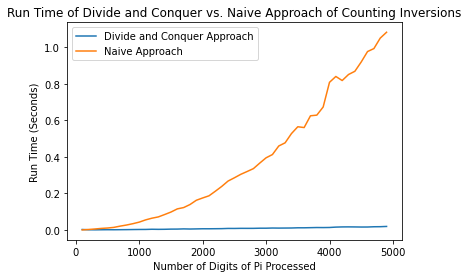

In [60]:
graph_plot(5000)

In [62]:
fast_inversions(1000000)

224964173233

The number of inversions in the first million digits of pi is 224964173233.